In [72]:
!pip install numpy
!pip install matplotlib
!brew install ffmpeg
!pip install scipy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
==> Auto-updating Homebrew...
Adjust how often this is run with `$HOMEBREW_AUTO_UPDATE_SECS` or disable with
`$HOMEBREW_NO_AUTO_UPDATE=1`. Hide these hints with `$HOMEBREW_NO_ENV_HINTS=1` (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
container: Create and run Linux containers using lightweight virtual machines
rails-mcp-server: MCP server for Rails applications
==> New Casks
qidistudio: Slicer software for QIDI 3D printers

You have 45 outdated formulae and 2 outdated casks installed.

To reinstall 8.0_1, run:
  brew reinstall ffmpeg
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 18.8 MB/s  0:00:01 eta 0:00:01

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip i

In [46]:
import numpy as np 

x = np.matrix([[1, 0], [0, 1]])
x**2
1j**2
[1, 1]*x

matrix([[1, 1]])

In [74]:
scipy.linalg.expm

<function scipy.linalg._matfuncs.expm(A)>

[np.float64(3.726653172078671e-06), np.float64(3.917722569745835e-06), np.float64(4.118175631742359e-06), np.float64(4.328451283391585e-06), np.float64(4.549007856918597e-06), np.float64(4.780323894003486e-06), np.float64(5.02289897888921e-06), np.float64(5.277254603087379e-06), np.float64(5.543935062755751e-06), np.float64(5.823508389852233e-06), np.float64(6.116567318201944e-06), np.float64(6.423730285646161e-06), np.float64(6.745642473475211e-06), np.float64(7.08297688438104e-06), np.float64(7.436435460199511e-06), np.float64(7.806750240747824e-06), np.float64(8.19468456509803e-06), np.float64(8.601034316664315e-06), np.float64(9.026629213518638e-06), np.float64(9.472334145387482e-06), np.float64(9.939050558820791e-06), np.float64(1.042771789206364e-05), np.float64(1.0939315061200768e-05), np.float64(1.1474861999185163e-05), np.float64(1.2035421249402789e-05), np.float64(1.2622099615467849e-05), np.float64(1.3236049868985182e-05), np.float64(1.3878472517060178e-05), np.float64(1.455

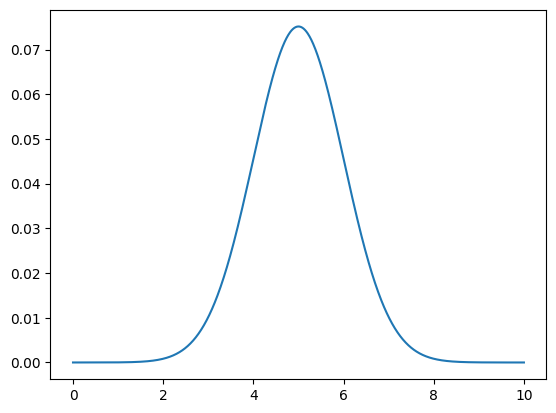

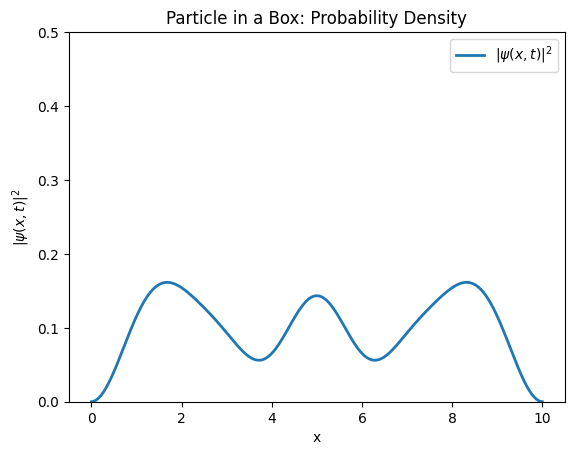

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
import math
from scipy.linalg import expm

#parameters
L = 10
nbins = 1000
delta_x = L/nbins
n=3 
delta_t = 0.01
m=1
taylor_order = 20
total_time = 300
save = True #whether or not to save the video

#wavefunction discretization 
x0 = np.linspace(0, L, nbins)
def get_psix_energy_eigenfunc(n, x):
    return np.sqrt(2/L)*np.sin((n*np.pi*x)/L)
def get_psix_gaussian(x):
    mu = 5
    sigma = 1
    return np.exp(- (x - mu)**2 / (2 * sigma**2))

def normalize(psi):
    norm = np.sqrt(np.sum(np.abs(psi)**2) * delta_x)
    return psi / norm

psi = [get_psix_gaussian(xi) for xi in x0]

D2 = np.diag([-2]*nbins)
D2 += np.diag([1]*(nbins-1), 1) 
D2 += np.diag([1]*(nbins-1), -1)

H = (-1/(delta_x**2 * 2*m)) * D2

time_ev_op = expm(-1j * H * delta_t)

##Update part
fig, ax = plt.subplots()
line, = ax.plot(x0, np.zeros_like(x), lw=2, label=r'$|\psi(x,t)|^2$')
ax.set(ylim=(0, 0.5),
       xlabel='x', ylabel=r'$|\psi(x,t)|^2$',
       title='Particle in a Box: Probability Density')
ax.legend(loc='upper right')

steps = int(np.ceil(total_time / delta_t))
frame_skip = 50  # increase to speed up animation by skipping frames

def init():
    y = np.abs((psi))**2
    line.set_ydata(y)
    return (line,)

def update(frame):
    # time step: interior only
    #print(psi)
    global psi 
    psi = time_ev_op @ psi
    # renormalize occasionally to tame Taylor truncation drift
    if (frame + 1) % 1 == 0:
        psi = normalize(psi)
    y = np.abs((psi))**2
    line.set_ydata(y)
    return (line,)

ani = FuncAnimation(
    fig, update, init_func=init,
    frames=range(0, steps, frame_skip),
    interval=30, blit=True
)

if save:
    ani.save("box.mp4", writer="ffmpeg", fps=int(1/delta_t/5))


running QHO with L = 10, m = 10, with starting wavefunction: gaussian
wavefunction set
Animation saved


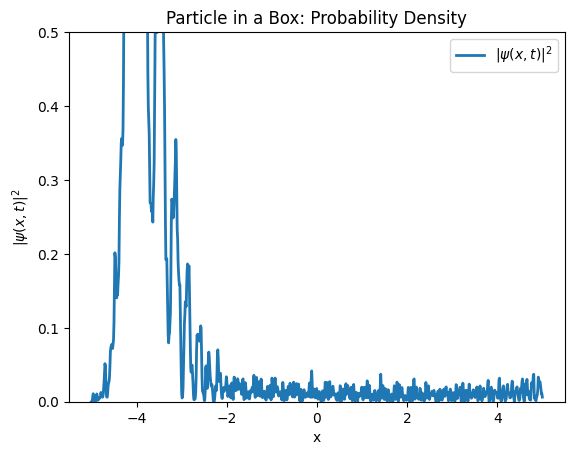

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from scipy.linalg import expm
from matplotlib.collections import PolyCollection
from matplotlib.colors import Normalize

#parameters
L = 10
nbins = 1000
delta_x = L/nbins
n=1 
delta_t = 0.01
m=10
taylor_order = 20
total_time = 500
omega = 1
x0 = np.linspace(-L/2, L/2, nbins) #initial x 

def main(x0_wavefunction, visualize, save=True):
    print(f"running QHO with L = {L}, m = {m}, with starting wavefunction: {x0_wavefunction}")
    psi_x = set_wavefunction(x0_wavefunction)
    if visualize == "psi_squared":
        time_evolve_psi_squared(psi_x, save)
    elif visualize == "psi_x":
        time_evolve_psi_x(psi_x, save)

def set_wavefunction(type):
    psi = np.zeros_like(x0)
    if type == "energy_eigenfunc":
        psi = np.array([np.sqrt(2/L)*np.sin((n*np.pi*x)/L) for x in x0], dtype=complex)
    elif type == "gaussian":
        mu = 5
        sigma = 1
        psi = np.array([np.exp(- (x - mu)**2 / (2 * sigma**2)) for x in x0], dtype=complex)
    print("wavefunction set")
    return psi

def normalize(psi):
    norm = np.sqrt(np.sum(np.abs(psi)**2) * delta_x)
    return psi / norm

def time_evolve_psi_squared(psi, save):
    D2 = np.diag([-2]*nbins)
    D2 += np.diag([1]*(nbins-1), 1) 
    D2 += np.diag([1]*(nbins-1), -1)
    
    X = np.diag([x**2 for x in x0])

    H = ((-1/(delta_x**2 * 2*m)) * D2) + (1/2) * (m) * (omega**2) * (X)

    time_ev_op = expm(-1j * H * delta_t)

    ##Update part
    fig, ax = plt.subplots()
    line, = ax.plot(x0, np.zeros_like(x0), lw=2, label=r'$|\psi(x,t)|^2$')
    ax.set(ylim=(0, 0.5),
        xlabel='x', ylabel=r'$|\psi(x,t)|^2$',
        title='Particle in a Box: Probability Density')
    ax.legend(loc='upper right')

    steps = int(np.ceil(total_time / delta_t))
    frame_skip = 50  # increase to speed up animation by skipping frames

    def init():
        y = np.abs((psi))**2
        line.set_ydata(y)
        return (line,)

    def update(frame):
        # time step: interior only
        nonlocal psi
        #print(psi)
        psi = time_ev_op @ psi
        # renormalize occasionally to tame Taylor truncation drift
        if (frame + 1) % 1 == 0:
            psi = normalize(psi)
        y = np.abs((psi))**2
        line.set_ydata(y)
        return (line,)

    ani = FuncAnimation(
        fig, update, init_func=init,
        frames=range(0, steps, frame_skip),
        interval=30, blit=True
    )
    if save:
        ani.save("box.mp4", writer="ffmpeg", fps=int(1/delta_t/5))
        print("Animation saved")
    
def time_evolve_psi_x(psi, save):
    D2 = np.diag([-2]*nbins)
    D2 += np.diag([1]*(nbins-1), 1) 
    D2 += np.diag([1]*(nbins-1), -1)
    
    X = np.diag([x**2 for x in x0])

    H = ((-1/(delta_x**2 * 2*m)) * D2) + (1/2) * (m) * (omega**2) * (X)

    time_ev_op = expm(-1j * H * delta_t)

    ##Update part
    fig, ax = plt.subplots()
    line, = ax.plot(x0, np.zeros_like(x0), lw=2, label=r'$\psi(x,t)$')
    ax.set(ylim = (-1, 1),
        xlabel='x', ylabel=r'$\psi(x,t)$',
        title='QHO: Wavefunction')
    ax.legend(loc='upper right')
    
    norm = Normalize(vmin=-np.pi, vmax=np.pi)
    cmap = plt.get_cmap('hsv')

    # Build initial colored fill under the curve using a PolyCollection
    y0 = np.abs(psi)**2
    phase0 = np.angle(psi)
    verts = [ [(x0[i], 0.0),
               (x0[i+1], 0.0),
               (x0[i+1], y0[i+1]),
               (x0[i], y0[i])] for i in range(nbins-1) ]
    # color each vertical strip by the phase at the left edge (could also use midpoint)
    colors = cmap(norm(phase0[:-1]))
    fill = PolyCollection(verts, facecolors=colors, edgecolor='none', zorder=1)
    ax.add_collection(fill)
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, pad=0.02)
    cbar.set_label("phase arg(ψ) [rad]")

    steps = int(np.ceil(total_time / delta_t))
    frame_skip = 50  # increase to speed up animation by skipping frames

    def init():
        y = np.real(psi)
        line.set_ydata(y)
        return (line,)

    def update(frame):
        # time step: interior only
        nonlocal psi
        #print(psi)
        psi = time_ev_op @ psi
        # renormalize occasionally to tame Taylor truncation drift
        if (frame + 1) % 1 == 0:
            psi = normalize(psi)
        y = np.real(psi)
        line.set_ydata(y)
        
        ax.relim()
        ax.autoscale_view()
        
        phase = np.angle(psi)
        new_verts = [ [(x0[i], 0.0),
                       (x0[i+1], 0.0),
                       (x0[i+1], y[i+1]),
                       (x0[i], y[i])] for i in range(nbins-1) ]
        fill.set_verts(new_verts)
        fill.set_facecolors(cmap(norm(phase[:-1])))
        
        return (line, fill)

    ani = FuncAnimation(
        fig, update, init_func=init,
        frames=range(0, steps, frame_skip),
        interval=30, blit=True
    )
    if save:
        ani.save("box_psi_x.mp4", writer="ffmpeg", fps=int(1/delta_t/5))
        print("Animation saved")

main('gaussian', 'psi_squared')

In [14]:
import numpy as np
L = 100
potential_offset = 4
nbins = 100
potential_width = 5
potential_height = 5
potential_array = [0] * int(nbins * potential_offset/L)
potential_array += ([potential_height] * int(nbins * potential_width/L))
pad_length = nbins - len(potential_array)
potential_array += [0] * pad_length
potential_array

[0,
 0,
 0,
 0,
 5,
 5,
 5,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [19]:
state = np.ones(10)
operator = np.identity(10)
state @ (operator @ state)

np.float64(10.0)